# Calculo Diferencial e Integral: `Sympy`

This note was prepared by [Renan Serpa](https://www.linkedin.com/in/renan-santos-serpa/) based on the video lecture at [SymPy (Symbolic Expressions on Python) in one video](https://youtu.be/kx2GzBeGPco)

O objetivo dessa seção é conhecer o pacote [Sympy](https://www.sympy.org/). Esse pacote extente a funcionalidade do Python para calculo symbolico. No Python puro, as variaveis sempre tem que ter um valor numero, ou seja, não podemos ter uma variavel incógnita. Usando o `sympy` podemos resolver integrais e equações diferenciais analiticamente, entre outras coisas. Aqui vamos aprender como definir uma função symbolica, como calcular a integral e a derivada dela. <br>


## Introdução

In [1]:
import sympy as sp

O proximo comando é para ter output bonito!

In [2]:
sp.init_printing() # escolhe a forma mais bonita para exibir o resultado. Se não for legal use `pprint()`

A primeira coisa a fazer apos importar o Sympy é definir variavles que vamos usar posteriormente. Não se preocupe, sempre pode acrescentar mais variavel se for necessario. A maneira mais facil é 

In [3]:
x ,y, z = sp.symbols('x y z')

Outra forma de definir é 

In [8]:
from sympy.abc import x, y, z

Agora vamos criar uma expressão (função) com essas variaveis. Prestem atenção que o nome da expressão *f* não foi definido anteriormente mas o Sympy a criou automaticamente. 

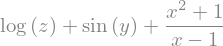

In [4]:
f= (x**2+1)/(x-1) + sp.sin(y)+sp.log(z)
f

Para definir uma função geral, sem ter uma expressão 

In [4]:
F = sp.Function("F")

In [6]:
F(x)

In [7]:
F(y)

Ou seja, a função `F` não tem uma variavel ou expressão vinculada.

### Substituição

Para calcular a função em um ponto especifico, temos que substituir a variavel simbolica por um numero

In [66]:
f = sp.sin(x)*sp.cos(y)
f

In [67]:
f.subs(x,sp.pi/2)

In [68]:
f.subs(x,sp.pi/2).subs(y,sp.pi) #para substituir os dois valores

### Valor numerico

Para pegar o valor numerico de uma expressão temos a função `N()`

In [6]:
sp.sqrt(2)

In [7]:
sp.N(sp.sqrt(2))

## Plot 2D

O backend do `sympy` para plotar é o pacote `matplotlib` mas a gente não precisa importar ele separadamente. 

In [9]:
from sympy.plotting import plot

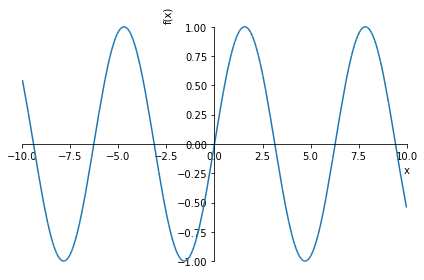

In [10]:
f=sp.sin(x)
plot(f) # essa função 'plot' é do pacote Sympy

Podemos delimitar os intervalo do plot

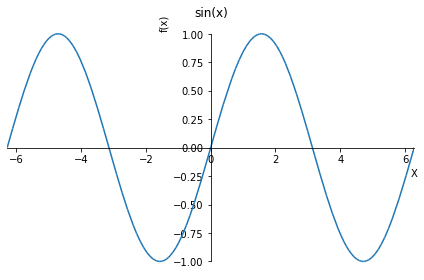

In [18]:
plot(f, (x,-2*sp.pi, 2*sp.pi), title = 'sin(x)', xlabel = "X")

Podemos plotar varias funções no mesmo intervalo

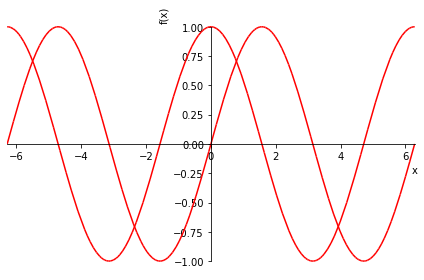

In [16]:
plot(sp.sin(x), sp.cos(x), (x,-2*sp.pi, 2*sp.pi),line_color='red')

Cada plot pode ter seu intervalo

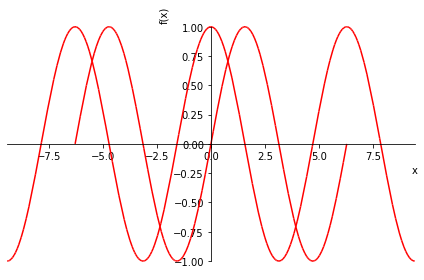

In [19]:
plot((sp.sin(x),(x,-2*sp.pi, 2*sp.pi)), (sp.cos(x), (x,-3*sp.pi, 3*sp.pi)),line_color='red')

Para que cada plot tenha uma cor difernte temos que fazer o seguinte

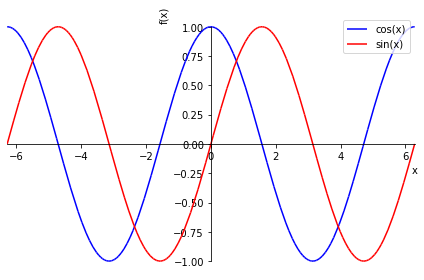

In [12]:
p1 = plot(sp.sin(x), (x,-2*sp.pi, 2*sp.pi), line_color = 'red', show = False, legend = True)
p2 = plot(sp.cos(x), (x,-2*sp.pi, 2*sp.pi), line_color = 'blue',show= False, legend = True)
p2.extend(p1)
p2.show()

## Plot 3D

In [27]:
from sympy.plotting import plot3d
%matplotlib notebook

O comando magico `%matplotlib notebook` é para tornar o grafico dinamico. Para voltar o modo estatico temos que executar o comando `%matplotlib inline`.

Agora vamos plotar a superficie (não-parametrizada) $z = \sin(x)\cos(x)$ no intervale $-\pi \leqslant x \leqslant\pi \quad \text{e} \quad -\pi \leqslant y \leqslant\pi$

<IPython.core.display.Javascript object>


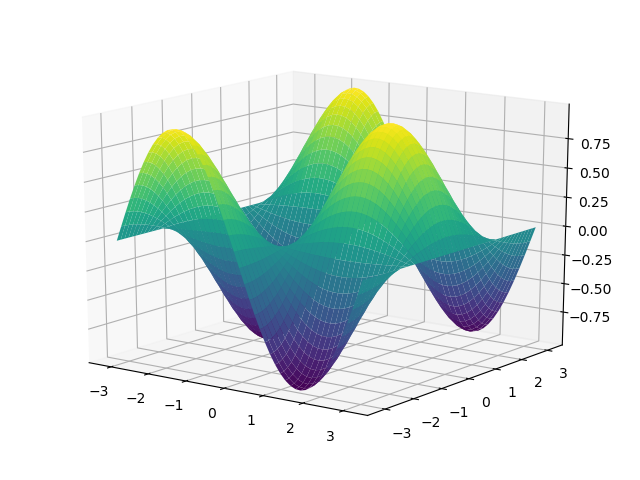

In [28]:
plot3d(sp.sin(x) * sp.cos(y), (x,-sp.pi, sp.pi),(y,-sp.pi, sp.pi))

### Outros plots

No total, o modulo `sympy.plotting` tem as seguintes funções de plot

- plot: Plots 2D line plots.

- plot_parametric: Plots 2D parametric plots.

- plot_implicit: Plots 2D implicit and region plots.

- plot3d: Plots 3D plots of functions in two variables.

- plot3d_parametric_line: Plots 3D line plots, defined by a parameter.

- plot3d_parametric_surface: Plots 3D parametric surface plots.

Podem consultar a documentação no [Plotting](https://docs.sympy.org/latest/modules/plotting.html)

## Algumas funções

Para definir uma integral

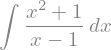

In [22]:
integ = sp.Integral((x**2+1)/(x-1)) 
integ

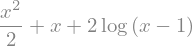

In [26]:
integ.doit()

Para definir uma matriz

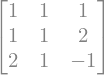

In [18]:
mat= sp.Matrix(((1,1,1),(1,1,2),(2,1,-1)))
mat

O objeto `mat` por fato de ser uma matriz tem metodos e atributos que podem ser chamados.

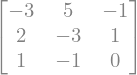

In [19]:
mat.cofactor_matrix()

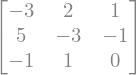

In [21]:
mat.inv()

## Simplificação

O sympy conhece muitas identidades para simplicar as expressões matematicas. 

In [33]:
f=sp.sin(x)**2 + sp.cos(x)**2
f

Agora esse `f` é um objeto e tem varios metodos que podemos aplicar nele. 

In [34]:
f.simplify()

In [35]:
f.trigsimp() #Mesma coisa mas focada mais em trigonométricas.

Podemos fatorizar o polinomial

In [27]:
f= x**3-x**2+x-1
f

In [28]:
f.factor()

Ou colocar uma variavel em evidencia

In [29]:
a, b=sp.symbols('a b')

sp.collect(a*x**2+b*x**2+a*x-b*x,x) #Evidência

Tem uma função do subdominio da `simplify` mas só para cortar os fatores comuns no numerador e denominador

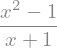

In [35]:
e = (x**2-1)/(x+1)
e

In [37]:
sp.cancel(e) #Comando mais dedicado a cancelar num e den. Simplify da no mesmo.

Muitas vezes a gente não quer simplicar a expressão, só precisamos cortar os fatores comuns no numerador e denominador. Neste exemplo especifico, as duas operações tem o mesmo resultado

In [38]:
e.simplify()

Outra função do subdominio da `simplify` para simplificar a potencia de uma expressão

In [43]:
sp.powsimp(x**a*x**b,)

Para combinar os logaritmos

In [41]:
l = a*sp.log(x);
l

In [42]:
sp.logcombine(l,force=True) #Argumento force em todos pode dar problemas quando mistura com
                                #números imaginários, cuidado se isso existir.

Podemos ver o `simplify` não dá o resultado desejado.

In [43]:
sp.simplify(l, force=True)

## Algumas operações

Para expandir uma expressão que tem potencia

In [45]:
f = (x+2)**10
f

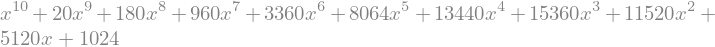

In [46]:
f.expand()

A função acima não expande as expressões trigonometrica, 

In [47]:
f = sp.sin(x+a)         
f

In [48]:
f.expand()  

Para as expressões trigonometricas temos

In [49]:
sp.expand_trig(f)

Para dividir uma epressão nas frações simples

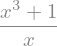

In [50]:
f = (x**3 + 1)/x
f

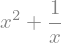

In [51]:
sp.apart(f)

A famosa decomposição de frações parciais, boa pra integrar depois, lembra?

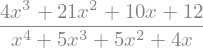

In [52]:
f=(4*x**3+21*x**2+10*x+12)/(x**4+5*x**3+5*x**2+4*x)
f

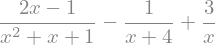

In [53]:
f.apart()

### Potências e logs

Algumas subfunções da `expand`

In [54]:
f = x**(a+b)
f

In [55]:
sp.expand_power_exp(f)

In [56]:
f = sp.log(x**2)
f

In [57]:
sp.expand_log(f,force=True)

O binomial é definido via

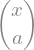

In [58]:
f=sp.binomial(x,a)
f

## Cálculo

### Derivadas

Para calcular a derivada de uma função temos duas opções

In [60]:
f=sp.cos(x*y)
f

In [61]:
sp.diff(f,x)

Ou

In [62]:
f.diff(x)

A segunda derivada é calculada via

In [72]:
sp.diff(f,x,2) #Número de derivadas, deu o mesmo.
            #Apenas mude o símbolo para derivar em outra variável.

In [73]:
f.diff(x,2)

Ou a derivada em relação das duas variaveis

In [74]:
f.diff(x,y)

### Integrais

A integração definida é 

In [63]:
df= sp.exp(-x)
df

In [64]:
sp.integrate(df,(x,0,sp.oo)) #infinito é dois ós

E indefinida 

In [65]:
sp.integrate(df,x) #Integral indefinida

E a integral dupla

In [69]:
f = sp.exp(-x**2-y**2)
f

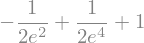

In [72]:
#Aqui é uma integral do tipo dS ... dxdy 
sp.integrate(f,(y,-x,x),(x,1,2))

### Limite

In [85]:
sp.limit(sp.sin(x)/x, x, 0)

E os limites direcionais

In [86]:
#Diferença de lados positivos e negativos
sp.limit(1/x,x,0,'+')


In [88]:
sp.limit(1/x,x,0,'-')

# Solvers

Primeiro temos que construir uma igualidade para depois resolver

In [91]:
#Construindo equação, algo = a algo
equ = sp.Eq(x**2,1) #x^2 =1
equ

In [92]:
sp.solveset(equ,x) #Todas as soluções possíveis

In [73]:
equ = sp.sin(x)-1
equ

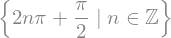

In [75]:
sp.solveset(equ,x) #Ciclo de soluções!

## Sistema de equações lineares

Aqui queremos resolver uma um sistema linear com tres equações e tres incognitas

$$
\begin{cases}
x+y+z = 1 \\
x+y+2z = 3 \\
2x+y-z = 10
\end{cases}
$$

Vamos definir as equaçoes de depois usamos o `linsolve` (ou `solve`) para resolver

In [4]:
eq1 = sp.Eq(x+y+z,1)
eq2 = sp.Eq(x+y+2*z,3)
eq3 = sp.Eq(2*x+y-z,10)

In [6]:
sp.linsolve((eq1,eq2,eq3),(x,y,z))

Um caso de solução impossível

In [7]:
eq1 = sp.Eq(x+y+z,1)
eq2 = sp.Eq(x+y+2*z,3)
eq3 = sp.Eq(x+y-z,5)

In [8]:

sp.linsolve((eq1,eq2,eq3),(x,y,z))

Também te dá caso seja indeterminado, fica em função de variavel

In [9]:
sp.linsolve([eq1,eq2],(x,y,z))

## Sistema de equações não lineares

In [10]:
eq1 = sp.Eq(x**2,1)
eq2 = sp.Eq(y**2,1)

In [11]:
sp.nonlinsolve((eq1,eq2),(x,y))

Em vez de todas as funções acima podiamos usar a função `solve`. Essa função é mais geral das funções acima e engloba elas. 

In [12]:
sp.solve((eq1,eq2),(x,y))

In [13]:
eq1 = sp.Eq(x+y+z,1)
eq2 = sp.Eq(x+y+2*z,3)
eq3 = sp.Eq(2*x+y-z,10)

In [14]:

sp.solve([eq1,eq2],(x,y,z))

In [15]:
sp.solve([eq1,eq2,eq3],(x,y,z))

## Expansão de Taylor

Em matemática, uma série de Taylor é a expressão de uma função como uma soma infinita cujos termos são expressos em termos dos valores das derivadas da função em um único ponto. É muito comum, na engenharia e fisica, trabalhar com a expansão de uma função em vez da sua forma original, expecialmente quando a gente precisa estudar o comportamento de uma função só perto de um ponto especifico.![Taylor1](./image/taylor2.gif)
Essa expansão para algumas funções mias conhecidas resulta
![Taylor](./image/taylor.png)

Aqui vamos montar uma função de calcula a expansão da função $f(x)=\sin(x)$ até a 5° ordem.

In [140]:

import sympy as sp
import numpy  as np


# Definir uma variavle e uma função para aproximar
x = sp.Symbol('x')
f = sp.sin(x)

# O ponto da expansão
x0 = 0

# A ordem da espansão
j=5

# Definir uma função para calcular as derivadas
def taylor(function ,x0 ,n):
    i = 0 ;
    p = 0
    while i<= n:
        p = p + (function.diff(x,i).subs(x,x0))/(sp.factorial(i))*(x-x0)**i
        i += 1
    return p 
    
func = taylor(f,x0 ,j)

print(f'Expansão de Tayler da f={f} ate a ordem n={j}  é {func}')


Expansão de Tayler da f=sin(x) ate a ordem n=5  é x**5/120 - x**3/6 + x


Agora podemos verificar se a função $sin(x)$ e a sua expanção tem aproxidamente o mesmo valor perto do ponto $x=0$.

In [136]:
func.subs(x,1)

101/120

In [137]:
N(func.subs(x,1))

0.841666666666667

In [138]:
N(sp.sin(1))

0.841470984807897

Até a terceira casa decimal são iguais. Para aumentar a precisão temos que calcular mais termos da expansão

**EXERCICIO:** montam uma interface grafica que como entrada pega uma função e um valor como a ordem da expansão e como resultado exibe a expansão de Taylor da função dada até a ordem dada. 

## Equações Diferenciaos Ordinarias

O SymPy fornece um solucionador de EDO genérico, `sympy.dsolve()`, capaz de encontrar soluções analíticas para muitos EDOs elementares. A função `sympy.dsolve()` tenta classificar automaticamente uma determinada EDO e pode tentar uma variedade de técnicas para encontrar sua solução. Vamos ver o funcionamento dessa função em ação. Aqui vamos tentar resolver a equação da [lei do resfriamento de Newton](https://pt.wikipedia.org/wiki/Lei_do_resfriamento_de_Newton) $\frac{T(t)}{dt} = -k(T(t) - T_a) $, com o valor inicial $T(0) = T_0$. $T(t)$ é a temperatura do objeto em relação do tempo e $T_a$ é a temperatura de ambiente. Vamos definir essa equação

In [23]:
import sympy as sp
T = sp.Function('T')
k, t, T_a = sp.symbols("k t T_a")
eq = sp.Eq(T(t).diff(t),- k*(T(t)-T_a))

In [84]:
eq

Eq(Derivative(T(t), t), -k*(-T_a + T(t)))

Sem considerar o valor inicial a solução é 

In [85]:
sol = sp.dsolve(eq)

In [86]:
sol

Eq(T(t), C1*exp(-k*t) + T_a)

Para impor a condição inicial (valor inicial, condição de contorno) usamos o agumento `ics` ($T(0) = 50$)

In [87]:
sol1 = sp.dsolve(eq, ics={T(0):50})

In [88]:
sol1

Eq(T(t), T_a + (50 - T_a)*exp(-k*t))

Como outro exemplo mais complicado vamos implementar a dinamica de um oscilador harmonico amortecido. Não pretendemos entrar na discussão fisica da equação, só a resolução da equação é nos intressa. A equação é 
$$
\frac{d^2x(t)}{dt^2} + 2 \gamma \omega_0 \frac{dx(t)}{dt} + \omega_0^2 x(t) = 0.
$$
onde $x(t)$ é a posição do oscilador no instante $t$, $\omega_0$ é a do oscilador idealizado (não-amortecido) e $\gamma$ é a taxa de amortecimento. 

Na primeira etapa vamos implementar a equação

In [24]:
x = sp.Function('x')
t, omega_0, gamma = sp.symbols("t , omega_0, gamma", positive = True) 
damp = sp.Eq(x(t).diff(t, 2) + 2 * gamma * omega_0 * x(t).diff(t) +
omega_0**2 * x(t), 0)

In [25]:
damp

Eq(2*gamma*omega_0*Derivative(x(t), t) + omega_0**2*x(t) + Derivative(x(t), (t, 2)), 0)

In [26]:
sol2 = sp.dsolve(damp)

In [27]:
sol2

Eq(x(t), C1*exp(omega_0*t*(-gamma - sqrt(gamma - 1)*sqrt(gamma + 1))) + C2*exp(omega_0*t*(-gamma + sqrt(gamma - 1)*sqrt(gamma + 1))))

Como podemos ver que tem duas constantes de integração para fixar. Assumimos que o objeto pendurado no oscilador no momento inicial estava no $x(0)=1$ com a velocidade zero, $\frac{dx(t)}{dt}|_{t=0}=0$

In [28]:
sol2 = sp.dsolve(damp, ics = {x(0):1, x(t).diff(t).subs(t,0):0})

In [29]:
sol2

Eq(x(t), (-gamma/(2*sqrt(gamma**2 - 1)) + 1/2)*exp(omega_0*t*(-gamma - sqrt(gamma - 1)*sqrt(gamma + 1))) + (gamma/(2*sqrt(gamma**2 - 1)) + 1/2)*exp(omega_0*t*(-gamma + sqrt(gamma - 1)*sqrt(gamma + 1))))

Todo mundo sabe que um oscilador harmonico amortecido vai perder a sua energia e vai parar de oscilar depois de um tempo. Vamos calcular o limite da equação acima quando $t \rightarrow \infty$. Primeiro temos que pegar o lado direito da equação

In [30]:
sol2_right = sol2.rhs

In [31]:
sol2_right

(-gamma/(2*sqrt(gamma**2 - 1)) + 1/2)*exp(omega_0*t*(-gamma - sqrt(gamma - 1)*sqrt(gamma + 1))) + (gamma/(2*sqrt(gamma**2 - 1)) + 1/2)*exp(omega_0*t*(-gamma + sqrt(gamma - 1)*sqrt(gamma + 1)))

Agora vamos fixar as constantes $\omega_0$ e $\gamma$

In [32]:
sol2_right = sol2_right.subs(omega_0,3).subs(gamma,0.02)

In [33]:
sol2_right

(1/2 + 0.0100020006002001*I)*exp(3*t*(-0.02 - 0.999799979995999*I)) + (1/2 - 0.0100020006002001*I)*exp(3*t*(-0.02 + 0.999799979995999*I))

Como dá para ver, essa função é complexa! Para ver o limite da parte real temos que pegar a parte real

In [34]:
sp.limit(sp.re(sol2_right), t, sp.oo)

0

## EDO Sem Solução Exata

Mas nem sempre uma equação diferencial tem uma solução analitica e exata. Por exemplo a equação $\frac{dy(x)}{dx} = x + y(x)^2$ não tem uma solução exata

In [100]:
y = sp.Function('y')
x = sp.symbols('x')
eq1 = sp.Eq(y(x).diff(x), x+y(x)**2);
eq1

Eq(Derivative(y(x), x), x + y(x)**2)

e a solução aproximada (analitica) é  

In [98]:
sol3 = sp.dsolve(eq1)

In [99]:
sol3

Eq(y(x), x**2*(2*C1**3 + 1)/2 + x**5*(10*C1**3*(6*C1**3 + 1) + 20*C1**3 + 3)/60 + C1 + C1*x**3*(3*C1**3 + 1)/3 + C1**2*x + C1**2*x**4*(12*C1**3 + 5)/12 + O(x**6))

Como podemos ver a solução é uma expansão. Nestes casos é melhor ir para uma solução numerica que será discutida em outra seção

## Opcional: Um programa para integrar e derivar

Até agora a gente tinha de definir as variaves simbolicas para puder definir funções. Tem uma função interna do `sympy` que consegue transformar (não sempre!) uma equação no formato `string` em um equação simbolica.

In [90]:
eq = sp.sympify("sin(x)^2 + 3*cos(x)")

In [91]:
eq

In [92]:
eq.diff()

Agora vamos escrever um programa com interface grafica que pede para o usuario inserir uma equação e depois calcular a integral dessa equação. O programa foi inspirado na resposta dada na questão [Displaying latex on a GUI with python](https://stackoverflow.com/questions/52211220/displaying-latex-on-a-gui-with-python)

In [10]:
import tkinter as tk
import sympy as sp
from io import BytesIO
from PIL import Image, ImageTk



def integrate():
    global img # isso é importante para que o Python não elimine esse objeto via garbage collection.
    x=sp.Symbol('x')
    integral=sp.integrate(eq.get(),x)
    var.set('Integration result='+ 'C\u2081')
    obj = BytesIO()
    sp.preview(integral, viewer='BytesIO', output='png', outputbuffer=obj)
    obj.seek(0)
    img = ImageTk.PhotoImage(Image.open(obj))
    img_lbl.configure(image=img)

win=tk.Tk()   

win2=tk.Frame(win)
win2.grid(column=0, row=0)

# Creates a static txt label
eq_static=tk.Label(win2,text='Introduce the equation f(x)',font=("Times New Roman", 14))
eq_static.grid(column=0,row=0,padx=5,pady=5)

eq=tk.StringVar(value='4*x')
eq_Entered=tk.Entry(win2,width=40, textvariable=eq)
eq_Entered.grid(column=1,row=0,padx=5,pady=5)

# Creates a static txt label
var=tk.StringVar()
eq_static=tk.Label(win2,textvariable=var,font=("Times New Roman", 14))
var.set('Result')
eq_static.grid(column=0,row=3,padx=5,pady=5)

# Calculate button
img = ''  # isso é importante para que o Python não elimine esse objeto via garbage collection.
img_lbl = tk.Label(win2)
img_lbl.grid()

action=tk.Button(win2,text='Integrate',command=integrate)
action.grid(column=2,row=0,padx=5,pady=5)
win2.mainloop()

**EXERCICIO:** Adiciona capacidade de derivar da função inserida.